In [237]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

1. Merged Dataset

In [238]:
Customer = pd.read_csv('Customer.csv')
Customer.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [239]:
Transactions = pd.read_csv('Transactions.csv')
Transactions.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [240]:
prod_cat_info = pd.read_csv('prod_cat_info.csv')
prod_cat_info = prod_cat_info.rename(columns={'prod_cat_code': 'prod_catcode'})
prod_cat_info.head()

,prod_catcode,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [241]:
temp = pd.merge(Customer, Transactions, left_on='customer_Id', right_on='cust_id')
temp = temp.drop(columns=['cust_id'])
temp.head()

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,268408,02-01-1970,M,4.0,87243835584,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop
1,268408,02-01-1970,M,4.0,16197868036,16-12-2013,1,4,-5,-210,110.250,-1160.250,Flagship store
2,268408,02-01-1970,M,4.0,16197868036,12/12/2013,1,4,5,210,110.250,1160.250,Flagship store
3,268408,02-01-1970,M,4.0,28810141075,2/9/2013,10,6,2,813,170.730,1796.730,TeleShop
4,268408,02-01-1970,M,4.0,64633435931,6/5/2013,4,2,3,312,98.280,1034.280,Flagship store


In [242]:
Customer_Final = pd.merge(temp, prod_cat_info, left_on=['prod_cat_code', 'prod_subcat_code'], right_on=['prod_catcode', 'prod_sub_cat_code'])
Customer_Final = Customer_Final.drop(columns=['prod_subcat_code', 'prod_cat_code'])
Customer_Final.head()

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,Qty,Rate,Tax,total_amt,Store_type,prod_catcode,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,13-01-2014,5,187,98.175,1033.175,TeleShop,5,Books,7,Fiction
1,275152,16-01-1970,M,4.0,73109425404,25-03-2011,2,464,97.440,1025.440,e-Shop,5,Books,7,Fiction
2,275034,18-01-1970,F,4.0,64777271023,23-05-2011,2,197,41.370,435.370,Flagship store,5,Books,7,Fiction
3,270829,22-01-1970,F,8.0,87174343938,9/12/2013,4,1141,479.220,5043.220,e-Shop,5,Books,7,Fiction
4,267657,29-01-1970,F,7.0,76242744953,23-05-2013,4,1020,428.400,4508.400,e-Shop,5,Books,7,Fiction


2. Summary Report

a.  Get the column names and their corresponding data types 

In [243]:
Customer_Final.dtypes

customer_Id            int64
DOB                   object
Gender                object
city_code            float64
transaction_id         int64
tran_date             object
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
prod_catcode           int64
prod_cat              object
prod_sub_cat_code      int64
prod_subcat           object
dtype: object

 b. Top/Bottom 10 observations

In [244]:
Customer_Final.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,Qty,Rate,Tax,total_amt,Store_type,prod_catcode,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,13-01-2014,5,187,98.175,1033.175,TeleShop,5,Books,7,Fiction
1,275152,16-01-1970,M,4.0,73109425404,25-03-2011,2,464,97.440,1025.440,e-Shop,5,Books,7,Fiction
2,275034,18-01-1970,F,4.0,64777271023,23-05-2011,2,197,41.370,435.370,Flagship store,5,Books,7,Fiction
3,270829,22-01-1970,F,8.0,87174343938,9/12/2013,4,1141,479.220,5043.220,e-Shop,5,Books,7,Fiction
4,267657,29-01-1970,F,7.0,76242744953,23-05-2013,4,1020,428.400,4508.400,e-Shop,5,Books,7,Fiction
5,274630,01-02-1970,M,4.0,78357345891,11/4/2012,1,646,67.830,713.830,TeleShop,5,Books,7,Fiction
6,273541,01-02-1970,M,4.0,23916816961,9/2/2013,4,410,172.200,1812.200,e-Shop,5,Books,7,Fiction
7,269008,13-02-1970,F,6.0,35560569829,9/3/2013,1,1441,151.305,1592.305,e-Shop,5,Books,7,Fiction
8,269008,13-02-1970,F,6.0,94033312891,26-04-2012,5,746,391.650,4121.650,MBR,5,Books,7,Fiction
9,267199,14-02-1970,NaN,2.0,56749259881,11/1/2012,4,1049,440.580,4636.580,MBR,5,Books,7,Fiction


In [245]:
Customer_Final.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,Qty,Rate,Tax,total_amt,Store_type,prod_catcode,prod_cat,prod_sub_cat_code,prod_subcat
23043,268914,15-11-1992,F,3.0,1407823655,10/6/2011,1,1252,131.460,1383.460,MBR,5,Books,10,Non-Fiction
23044,269519,17-11-1992,M,9.0,29719500605,24-12-2013,4,1036,435.120,4579.120,TeleShop,5,Books,10,Non-Fiction
23045,273524,25-11-1992,F,1.0,25762805863,19-11-2012,1,1401,147.105,1548.105,Flagship store,5,Books,10,Non-Fiction
23046,272141,02-12-1992,F,10.0,71337087467,22-07-2012,-3,-1422,447.930,-4713.930,e-Shop,5,Books,10,Non-Fiction
23047,272141,02-12-1992,F,10.0,71337087467,16-07-2012,3,1422,447.930,4713.930,e-Shop,5,Books,10,Non-Fiction
23048,267812,04-12-1992,F,1.0,63540378797,10/10/2012,3,224,70.560,742.560,TeleShop,5,Books,10,Non-Fiction
23049,274618,09-12-1992,F,7.0,71793203305,17-08-2013,4,691,290.220,3054.220,Flagship store,5,Books,10,Non-Fiction
23050,268097,15-12-1992,F,7.0,91217108818,1/2/2012,2,411,86.310,908.310,e-Shop,5,Books,10,Non-Fiction
23051,268097,15-12-1992,F,7.0,90114483354,31-01-2011,-4,-1408,591.360,-6223.360,e-Shop,5,Books,10,Non-Fiction
23052,268097,15-12-1992,F,7.0,90114483354,26-01-2011,4,1408,591.360,6223.360,e-Shop,5,Books,10,Non-Fiction


 c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max) 

In [246]:
cont_var = Customer_Final[['Qty', 'Rate', 'Tax', 'total_amt']]
for var in cont_var.columns:
    print("Mean of {}: {}".format(var, cont_var[var].mean()))
    print("Q1 of {}: {}".format(var, cont_var[var].quantile(0.25)))
    print("Median of {}: {}".format(var, cont_var[var].median()))
    print("Q3 of {}: {}".format(var, cont_var[var].quantile(0.75)))
    print("Max of {}: {}".format(var, cont_var[var].max()))
    print("")

Mean of Qty: 2.4323949160629854
Q1 of Qty: 1.0
Median of Qty: 3.0
Q3 of Qty: 4.0
Max of Qty: 5

Mean of Rate: 636.3697132694226
Q1 of Rate: 312.0
Median of Rate: 710.0
Q3 of Rate: 1109.0
Max of Rate: 1500

Mean of Tax: 248.66719168871586
Q1 of Tax: 98.28
Median of Tax: 199.08
Q3 of Tax: 365.715
Max of Tax: 787.5

Mean of total_amt: 2107.30800199539
Q1 of total_amt: 762.45
Median of total_amt: 1754.74
Q3 of total_amt: 3569.15
Max of total_amt: 8287.5



d. Frequency tables for all the categorical variables 

In [247]:
cat_var = Customer_Final[['Gender', 'city_code', 'Store_type', 'prod_cat', 'prod_subcat']]
for var in cat_var:
    print(cat_var[var].value_counts())
    print("")

M    11811
F    11233
Name: Gender, dtype: int64

4.0     2422
3.0     2411
5.0     2360
7.0     2356
10.0    2333
8.0     2330
2.0     2270
1.0     2258
9.0     2178
6.0     2127
Name: city_code, dtype: int64

e-Shop            9311
MBR               4661
Flagship store    4577
TeleShop          4504
Name: Store_type, dtype: int64

Books               6069
Electronics         4898
Home and kitchen    4129
Footwear            2999
Clothing            2960
Bags                1998
Name: prod_cat, dtype: int64

Women                  3048
Mens                   2912
Kids                   1997
Tools                  1062
Fiction                1043
Kitchen                1037
Children               1035
Comics                 1031
Mobiles                1031
Bath                   1023
Furnishing             1007
Non-Fiction            1004
DIY                     989
Cameras                 985
Personal Appliances     972
Academic                967
Computers               958
Audio and

3. Generate histograms for all continuous variables and frequency bars for categorical variables. 

Qty


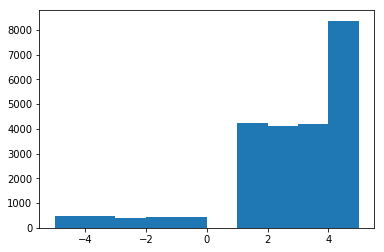

Rate


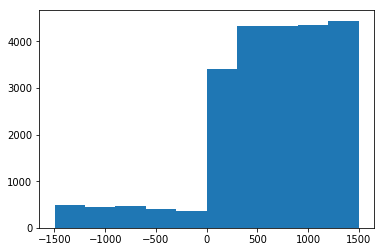

Tax


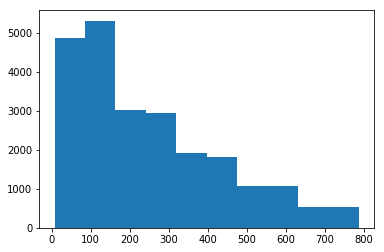

total_amt


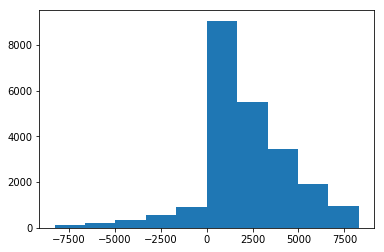

In [248]:
for var in cont_var.columns:
    print(var)
    plt.hist(cont_var[var])
    plt.show()

Gender


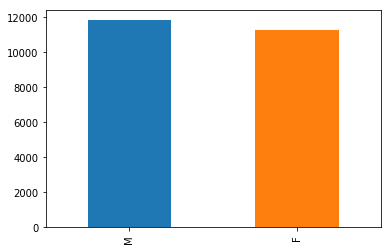

city_code


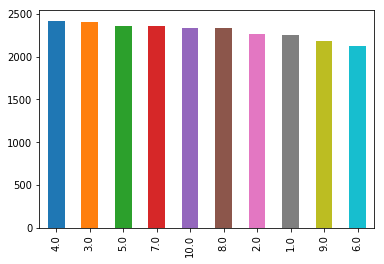

Store_type


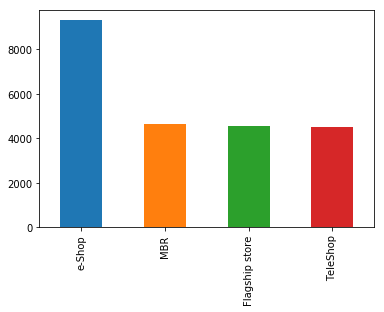

prod_cat


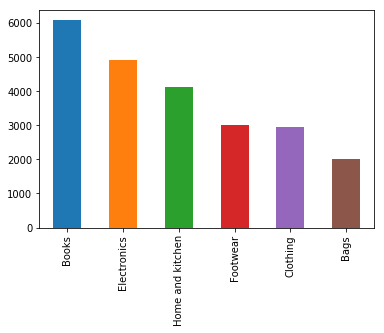

prod_subcat


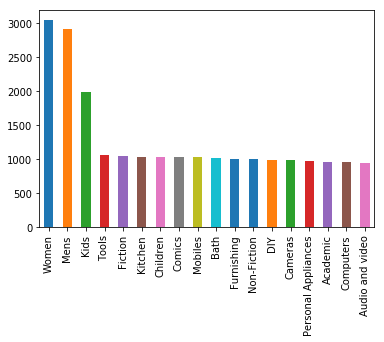

In [249]:
for var in cat_var.columns:
    print(var)
    cat_var[var].value_counts().plot(kind='bar')
    plt.show()

4. Calculate the following information using the merged dataset : 

  a. Time period of the available transaction data

In [250]:
from datetime import datetime, timedelta

In [251]:
StartDate = Customer_Final['tran_date'].min()
EndDate = Customer_Final['tran_date'].max()
StartDate = datetime.strptime(StartDate,"%d/%m/%Y")
EndDate = datetime.strptime(EndDate,"%d/%m/%Y")
days = (EndDate - StartDate).days
print("The period of the available transaction data is {} days.".format(days))

The period of the available transaction data is 617 days.


  b. Count of transactions where the total amount of transaction was negative 

In [252]:
print("The total amount of transaction was negative for {} transactions.".format(Customer_Final['total_amt'][Customer_Final['total_amt'] < 0].count()))

The total amount of transaction was negative for 2177 transactions.


5. Analyze which product categories are more popular among females vs male customers. 

In [253]:
gender = Customer_Final.groupby(['Gender'])
gender.prod_cat.value_counts()

Gender  prod_cat        
F       Books               2949
        Electronics         2328
        Home and kitchen    1994
        Footwear            1529
        Clothing            1439
        Bags                 994
M       Books               3116
        Electronics         2570
        Home and kitchen    2134
        Clothing            1518
        Footwear            1469
        Bags                1004
Name: prod_cat, dtype: int64

6.  Which City code has the maximum customers and what was the percentage of customers from that city? 

In [254]:
print("The City code {} has the maximum customers.".format(Customer_Final['city_code'].mode()[0]))
print("The percentage of customers in this city is {}%.".format(round(Customer_Final['city_code'].value_counts()[Customer_Final['city_code'].mode()[0]] / Customer_Final['city_code'].value_counts().sum() * 100,2)))

The City code 4.0 has the maximum customers.
The percentage of customers in this city is 10.51%.


7. Which store type sells the maximum products by value and by quantity? 

In [255]:
store = pd.Series(Customer_Final.groupby(['Store_type'])['total_amt'].sum())
quantity = pd.Series(Customer_Final.groupby(['Store_type'])['Qty'].sum())
print("{} sells maximum products by value. The value is {}.".format(store[store == store.max()].index[0],store.max())) 
print("{} sells maximum products by quantity. The quantity is {}.".format(quantity[quantity == quantity.max()].index[0],quantity.max()))

e-Shop sells maximum products by value. The value is 19824816.050000083.
e-Shop sells maximum products by quantity. The quantity is 22763.


8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores? 

In [256]:
Amount = Customer_Final[(Customer_Final['Store_type'] == 'Flagship store') & ((Customer_Final['prod_cat'] == 'Electronics') | (Customer_Final['prod_cat'] == 'Clothing'))]['total_amt'].sum()
print("The total amount earned from the Electronics and Clothing categories from Flagship Stores is {}".format(Amount))

The total amount earned from the Electronics and Clothing categories from Flagship Stores is 3409559.27


9. What was the total amount earned from "Male" customers under the "Electronics" category? 

In [257]:
Amount = Customer_Final[(Customer_Final['Gender'] == 'M') & (Customer_Final['prod_cat'] == 'Electronics')]['total_amt'].sum()
print("The total amount earned from Male customers under the Electronics category is {}.".format(Amount))

The total amount earned from Male customers under the Electronics category is 5703109.425.


10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts? 

In [258]:
nonneg = Customer_Final[Customer_Final['total_amt'] > 0]
count = (nonneg.groupby(['customer_Id'])['transaction_id'].count() > 10 ).value_counts()[True]
print("{} customers have more than 10 unique transactions, after removing all transactions which have any negative amounts. ".format(count))

6 customers have more than 10 unique transactions, after removing all transactions which have any negative amounts. 


11. For all customers aged between 25 - 35, find out:

 a. What was the total amount spent for “Electronics” and “Books” product categories? 

In [259]:
Customer_Final['Age'] = Customer_Final['DOB'].apply(lambda x: (datetime.today() - datetime.strptime(x,"%d-%m-%Y")).days / 365.25)
AgeRange = Customer_Final[(Customer_Final['Age'] > 25) & (Customer_Final['Age'] < 35)]
Amount = AgeRange[(AgeRange['prod_cat'] == 'Electronics') | (AgeRange['prod_cat'] == 'Books')]['total_amt'].sum()
print("The total amount spend for Electronics and Books product categories is {}.".format(Amount))

The total amount spend for Electronics and Books product categories is 8833909.24.


 b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [260]:
def parse_date(string):
    for form in ('%d-%m-%Y', '%d/%m/%Y'):
        try:
            return datetime.strptime(string, form)
        except ValueError:
            pass
    raise ValueError('no valid date format found')

In [261]:
Customer_Final['new_tran_date'] = Customer_Final['tran_date'].apply(lambda x: parse_date(x))

In [262]:
StartDate = datetime.strptime('01/01/2014',"%d/%m/%Y")
EndDate = datetime.strptime('01/03/2014',"%d/%m/%Y")
Amount = Customer_Final[(Customer_Final['new_tran_date'] > StartDate) & (Customer_Final['new_tran_date'] < EndDate)]['total_amt'].sum()
print("The total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014 is {}.".format(Amount))

The total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014 is 2175087.525.
